In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from lmfit import minimize, Parameters, Parameter, report_fit
from math import pow

In [3]:
Vsenders=1.5*10**(-3)
Vreceivers=2.5*10**(-3)
Vall=4*10**(-3)
NA=6.2*10**(23)
def molecules(number): #turns nM to molecules
    return number*NA*10**(-12)

def molar(number): #turns molecules to M
    return(number*10**(15))/NA

def molar_2(number):
    return(number*10**(3))/(NA)

def OD(number):
    return (number*3*10**(7))

In [22]:
#sender's population 
mi= 0.015
CN=10
n=2
D_aTc=0.67*60
D_ahl=100
Vecoli=10**(-15)
Vbead=200*10**(-6)
Vc=Vecoli/Vbead
d_aTc=0.034/60
d_mrnatetr=0.023*60
Nmin=1.42*0.32*10**(7) #1/7 of receivers
Nmax=1.42*1.04*10**(7) 
d_tetr=0.0692
d_ahl=0.01
d_mrnaluxi=0.347
d_luxi=0.00167
d_cmplx=0.025
kluxi=3.95*60 #*10**(-3) #FOR BCD2
kA= 0.04 
k_min_one=4.2*10**(-4)
small=0
Vecoli=10**(-15)
Vbead=20*10**(-6)
Vc=Vecoli/Vbead
n=2
kd_cmplx=15*10**(-9)
kd_ptet=50*10**(-9)
k1=k_min_one/kd_cmplx
b_ptet=0
ptet=22*60*10**(-3)
p_105=30*60*10**(-3)
k_034=11*60*10**(-3)

#model_fit_functions
def f_s(x,t,paras_s):
    N_a=x[0]
    aTc_ext=x[1]
    aTc_int=x[2]
    TetR=x[3]
    cmplx=x[4]
    LuxI=x[5]
    AHL_int=x[6]
    AHL_ext=x[7]
    
    try:
        mi = paras_s['mi'].value
        a_tetr = paras_s['a_tetr'].value
        b_ptet=paras_s['b_ptet'].value
        a_luxi = paras_s['a_luxi'].value
        kd_ptet=paras_s['kd_ptet'].value
        n = paras_s['n'].value


    except KeyError:
        mi,a_tetr,b_ptet,a_luxi,kd_ptet,n = paras_s

    dNdt=small+mi*N_a*(1-(N_a/Nmax))
    daTc_extdt=small+ Vc*D_aTc*N_a*(aTc_int-aTc_ext)-(d_aTc+mi)*aTc_ext
    daTc_intdt=small+ D_aTc*Vc*10**(10)*(aTc_ext-aTc_int)+k_min_one*cmplx-(d_aTc+mi)*aTc_int-k1*aTc_int*TetR
    dTetRdt=small+molar(a_tetr*CN/(d_mrnatetr+mi))+k_min_one*cmplx-k1*TetR*aTc_int-(d_tetr+mi)*TetR
    dcmplxdt=small+k1*TetR*aTc_int-k_min_one*cmplx-(d_cmplx+mi)*cmplx
    dLuxIdt=small+(a_luxi*CN/(d_mrnaluxi+mi))*(b_ptet+(1-b_ptet)*((pow(abs(cmplx),n))/((pow(abs(cmplx),n))+(pow(kd_ptet*CN,n))))) - (d_luxi+mi)*LuxI -kA*LuxI
    dAHL_intdt=small+kA*LuxI-(d_ahl+mi)*AHL_int+D_ahl*(Vc*AHL_ext-AHL_int)
    dAHL_extdt=small+D_ahl*N_a*(AHL_int-Vc*AHL_ext)-(d_ahl+mi)*AHL_ext
    
    return [dNdt,daTc_extdt,daTc_intdt,dTetRdt,dcmplxdt,dLuxIdt,dAHL_intdt,dAHL_extdt]

def g_s(t, x0, paras_s):
    """
    Solution to the ODE x'(t) = f(t,x,k) with initial condition x(0) = x0
    """
    x = odeint(f_s, x0, t, args=(paras_s,))
    return x

params_s=Parameters()
params_s.add('mi', value=0.015, min=0, max=0.1)
params_s.add('a_tetr',value=1.18, min=0.1,max=100)
params_s.add('b_ptet', value=0, min=0, max=1)
params_s.add('a_luxi', value=312, min=0.1, max=1000)
params_s.add('kd_ptet', value=50*10**(-9), min=10**(-12), max=10**(-6))
params_s.add('n', value=2, min=0.25, max=4)
params_s['mi'].value=0.032
params_s['a_tetr'].value=10.22
params_s['b_ptet'].value=0.02
params_s['a_luxi'].value=128
params_s['kd_ptet'].value=25*10**(-10)
params_s['n'].value=2


def molar_2(number):
    return(number*10**(4))/(2*(NA))

patterns=np.array([[0,0,0],[0,0,1],[0,1,0],[0,1,1],[1,0,0],[1,0,1],[1,1,0],[1,1,1]])
name_values=np.array([128,47.5,47.5])
y=np.array([0,0,0,1,1,1,1,1])
concentrations_s=[]


for i in range(8):
    params_s['a_luxi'].value=np.sum(name_values*patterns[i,:])
    #print(params_s['a_luxi'].value)
    y0_s=[Nmin,10**(-6),0,0,0,0,0,0]
    model_fit_s=g_s(np.linspace(0,600,100),y0_s,params_s)
    #print(max(model_fit_s[:,5]))
    AHL_molecs=max(model_fit_s[:,7])
    print(AHL_molecs)
    temp_s=AHL_molecs
    concentrations_s.append(molar_2(AHL_molecs))
print(concentrations_s)



369998405.5265938
175749250409.19238
175749250409.19238
351498497115.00464
473597979351.46454
649347228953.6572
649347228953.6572
825096457040.9401
[2.9838581090854343e-12, 1.4173326645902611e-09, 1.4173326645902611e-09, 2.8346652993145537e-09, 3.819338543156972e-09, 5.236671201239171e-09, 5.236671201239171e-09, 6.6540036858140336e-09]


2539.3193497280267
2973.6087281810674
2973.6087281810674
13449.76619151099
15638.387578471848
16771.000322072912
16771.000322072912
17265.43888720229
[2539.3193497280267, 2973.6087281810674, 2973.6087281810674, 13449.76619151099, 15638.387578471848, 16771.000322072912, 16771.000322072912, 17265.43888720229]
[2539, 2539, 2539, 18387, 18387, 18387, 18387, 18387]


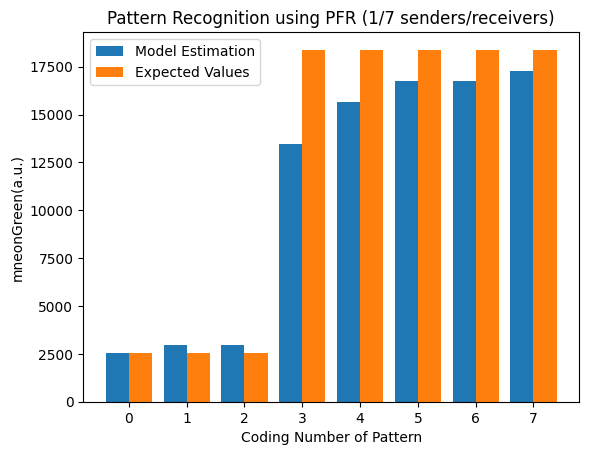

In [6]:
#receiver's PFR population
small=0
CN=17
mi=0.0028 #FROM OPLO
t=np.linspace(0, 600) 
#for transcription and translation rates of constructs
pluxr=155*60*10**(-3)
kluxr=27*60*10**(-3)
a1=pluxr*kluxr
plux_repr=3.69*10**(-3)*60
kphlf=4*10**(-3)*60
a2=plux_repr*kphlf
phybrid=10*60*10**(-3)
kmng=18.3*60*10**(-3)
Nmin=3.2*10**(7) #at 0.2mL -> OD=0.2
Nmax=10.4*10**(7) # at 0.2mL -> OD=0.5
a3=phybrid*kmng
n=2
#leakiness of promoters
b_plux=0.1 #FROM OPLO
b_pphlf=0.1
#for luxr-ahl dimer
kd1=100*10**(-9)
kd2=20*10**(-9)
k_min_one=10
k_min_two=1
k1=k_min_one/kd1
k2=k_min_two/kd2
kdlux=10*10**(-9) #FROM OPLO
kdlux_repr=kdlux
kdphlf=2*10**(-7)
#degradation rates
d_mrnamng=0.023 #FROM OPLO 
d_mng=0.019 #FROM OPLO
d_mrnaluxr=0.347
d_mon=0.156
d_dim=0.017
d_luxr=0.002
d_AHL=0.01
d_mrnaphlf=0.02*60
d_phlf=0.042
#for Diffusion
D=10
Vecoli=10**(-15)
Vbead=200*10**(-6)
Vc=Vecoli/Vbead

def f_r2(x,t,paras):
    Ni=x[0]
    AHL_ext=x[1]
    AHL_int=x[2]
    LuxR=x[3]
    Mon=x[4]
    Dim=x[5]
    phlf=x[6]
    mng=x[7]
    
    
    try:
        a1 = paras['a1'].value
        a2= paras['a2'].value
        a3 = paras['a3'].value
        n = paras['n'].value
        b_pphlf=paras['b_pphlf'].value
        kdphlf=paras['kdphlf'].value
        d_phlf = paras['d_phlf'].value
        d_mrnaphlf = paras['d_mrnaphlf'].value


    except KeyError:
        a1,a2,a3,n,b_pphlf,kdphlf,d_phlf,d_mrnaphlf= paras
    
    dNdt=small+mi*Ni*(1-(Ni/Nmax))
    dAHL_extdt=small+D*Vc*Ni*(AHL_int-AHL_ext)-(d_AHL+mi)*AHL_ext
    dAHLdt=small+k_min_one*Mon-k1*AHL_int*LuxR -(d_AHL+mi)*AHL_int +D*Vc*10**(11)*(AHL_ext-AHL_int)
    dLuxRdt=small+ molar(((a1*CN))/(d_mrnaluxr+mi))*(b_plux+(1-b_plux)*((pow(abs(Dim),n))/((pow(abs(Dim),n))+(pow(kdlux,n))))) - (d_luxr+mi)*LuxR + k_min_one*Mon - k1*LuxR*AHL_int
    dMondt=small+ (k1*LuxR*AHL_int+2*k_min_two*Dim-k_min_one*Mon-2*k2*(Mon**2)-(d_mon+mi)*Mon)
    dDimdt=small+ (k2*(Mon**2)-k_min_two*Dim-(d_dim+mi)*Dim)
    dphlfdt=small+molar((a2*CN)/(d_mrnaphlf+mi))*(b_plux+(1-b_plux)*((pow(abs(kdlux),n))/((pow(abs(Dim),n))+(pow(kdlux,n))))) - d_phlf*phlf
    Hill_1=(b_pphlf+(1-b_pphlf)*((pow(abs(Dim),n))/((pow(abs(Dim),n))+(pow(kdlux,n)))))
    Hill_2=(b_plux+(1-b_plux)*((pow(abs(kdphlf),n))/((pow(abs(phlf),n))+(pow(kdphlf,n)))))
    dmngdt =small+ ((a3*CN)/(d_mrnamng+mi))*Hill_1*Hill_2 - (d_mng+mi)*mng
    
    return [dNdt,dAHL_extdt,dAHLdt,dLuxRdt,dMondt,dDimdt,dphlfdt,dmngdt]

def g_r2(t, x0, paras):
    """
    Solution to the ODE x'(t) = f(t,x,k) with initial condition x(0) = x0
    """
    x = odeint(f_r2, x0, t, args=(paras,))
    return x


params_r2=Parameters()
params_r2.add('a1',value=15, min=0.1,max=50)
params_r2.add('a2', value=0.053, min=0.1, max=50)
params_r2.add('a3', value=0.6588, min=0.1, max=50)
params_r2.add('n',value=2,min=0.5,max=4)
params_r2.add('b_pphlf',value=0.1,min=0,max=1)
params_r2.add('kdphlf',value=2*10**(-7),min=10**(-12),max=10**(-6))
params_r2.add('d_phlf',value=0.042,min=10**(-2),max=0.1)
params_r2.add('d_mrnaphlf',value=1.2,min=10**(-2),max=0.1)
params_r2['a1'].value=5.67
params_r2['a2'].value=0.1
params_r2['a3'].value=0.62
params_r2['n'].value=2.31
params_r2['b_pphlf'].value=0.36
params_r2['kdphlf'].value= 7.95*10**(-7)
params_r2['d_phlf'].value=0.03
params_r2['d_mrnaphlf'].value=0.06


out_r2=[]
out_patt=[2539,2539,2539,18387,18387,18387,18387,18387] #min and max values of corresponding to 0 and 1 values
patterns_code=np.array([0,1,2,3,4,5,6,7])
for i in range(8):
    y0_r2=[Nmin,concentrations_s[i],0,0,0,0,0,0]
    model_fit_r2=g_r2(np.linspace(0,300,100),y0_r2,params_r2)
    print(max(model_fit_r2[:,7]))
    out_r2.append(max(model_fit_r2[:,7]))
print(out_r2)
print(out_patt)
plt.bar(patterns_code-0.2,out_r2,0.4,label='Model Estimation')
plt.bar(patterns_code+0.2,out_patt,0.4,label='Expected Values')
plt.xlabel('Coding Number of Pattern')
plt.ylabel('mneonGreen(a.u.)')
plt.title('Pattern Recognition using PFR (1/7 senders/receivers)')
plt.legend()
plt.show()



8502.821115544019


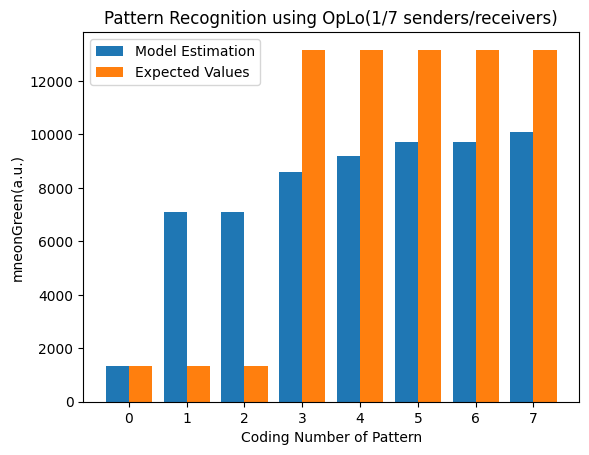

In [23]:
#receiver's OpLo population
CN=17 #medium copy number
mi= 0.015
NA=6.2*10**(23)
kmng=(18*10**(-3))*60 #RBS34
kluxr=(27*10**(-3))*60 #1.62
Nmin=3.2*10**(7) #at 0.2mL -> OD=0.2
Nmax=10.4*10**(7) # at 0.2mL -> OD=0.5
kd1=100*10**(-9)
kd2=20*10**(-9)
k_min_one=10
k_min_two=1
k1=k_min_one/kd1
k2=k_min_two/kd2
kdlux=200*10**(-9)
d_mrnamng=0.039 
d_mng=0.01
d_mrnaluxr=0.347
d_mon=0.156
d_dim=0.017
d_luxr=0.002
d_AHL=0.01
D=10
Vecoli=10**(-15)
Vbead=200*10**(-6)
Vc=Vecoli/Vbead
n=1.5
b_plux=0.05 #percentage of leakage
plux=0.79 #promoters
pcon=(58.5*10**(-3))*60 #3.51


def f_r1(x,t,paras):
    Ni=x[0]
    AHL_ext=x[1]
    AHL_int=x[2]
    LuxR=x[3]
    Mon=x[4]
    Dim=x[5]
    mng=x[6]
    
    
    try:
        mi = paras['mi'].value
        a_luxr = paras['a_luxr'].value
        b_plux=paras['b_plux'].value
        a_mng = paras['a_mng'].value
        kdlux=paras['kdlux'].value
        n = paras['n'].value
        d_mng = paras['d_mng'].value
        d_mrnamng = paras['d_mrnamng'].value


    except KeyError:
        mi,a_luxr_b_plux,a_mng,n,d_mng = paras
    
    dNdt=small+mi*Ni*(1-(Ni/Nmax))
    dAHL_extdt=small+D*Vc*Ni*(AHL_int-AHL_ext)-(d_AHL+mi)*AHL_ext
    dAHLdt=small+k_min_one*Mon-k1*AHL_int*LuxR -(d_AHL+mi)*AHL_int +D*Vc*10**(11)*(AHL_ext-AHL_int)
    dLuxRdt=small+ molar(((a_luxr*CN))/(d_mrnaluxr+mi)) - (d_luxr+mi)*LuxR + k_min_one*Mon - k1*LuxR*AHL_int
    dMondt=small+ (k1*LuxR*AHL_int+2*k_min_two*Dim-k_min_one*Mon-2*k2*(Mon**2)-(d_mon+mi)*Mon)
    dDimdt=small+ (k2*(Mon**2)-k_min_two*Dim-(d_dim+mi)*Dim)
    dmngdt =small+ ((a_mng*CN)/(d_mrnamng+mi))*(b_plux+(1-b_plux)*((pow(abs(Dim),n))/((pow(abs(Dim),n))+(pow(kdlux,n))))) - (d_mng+mi)*mng
    
    return [dNdt,dAHL_extdt,dAHLdt,dLuxRdt,dMondt,dDimdt,dmngdt]

def g_r1(t, x0, paras):
    """
    Solution to the ODE x'(t) = f(t,x,k) with initial condition x(0) = x0
    """
    x = odeint(f_r1, x0, t, args=(paras,))
    return x

params_r1=Parameters()
params_r1.add('mi', value=0.015, min=0.001, max=0.1)
params_r1.add('b_plux',value=0.1, min=0,max=1)
params_r1.add('a_luxr', value=5.68, min=10**(-1), max=50)
params_r1.add('a_mng', value=0.85, min=10**(-1), max=50)
params_r1.add('kdlux', value=200*10**(-9), min=10**(-11), max=10**(-7))
params_r1.add('n', value=1.5, min=0.25, max=4)
params_r1.add('d_mng',value=0.01,min=0.01,max=0.1)
params_r1.add('d_mrnamng',value=0.039,min=0.01,max=0.1)
params_r1['mi'].value=0.0028
params_r1['b_plux'].value=0.1
params_r1['a_luxr'].value=49.78
params_r1['a_mng'].value=0.44
params_r1['kdlux'].value=10*10**(-9)
params_r1['n'].value=0.5
params_r1['d_mng'].value=0.023
params_r1['d_mrnamng'].value=0.019

y0_r1=[Nmin,2.69*10**(-9),0,0,0,0,0]
model_fit_r1=g_r1(np.linspace(0,360,100),y0_r1,params_r1)
print(max(model_fit_r1[:,6]))


out_r1=[]
out_patt=[1329,1329,1329,13170,13170,13170,13170,13170] #min and max values of corresponding to 0 and 1 values
patterns_code=np.array([0,1,2,3,4,5,6,7])
for i in range(8):
    y0_r1=[Nmin,concentrations_s[i],0,0,0,0,0]
    model_fit_r1=g_r1(np.linspace(0,300,100),y0_r1,params_r1)
    out_r1.append(max(model_fit_r1[:,6]))

plt.bar(patterns_code-0.2,out_r1,0.4,label='Model Estimation')
plt.bar(patterns_code+0.2,out_patt,0.4,label='Expected Values')
plt.xlabel('Coding Number of Pattern')
plt.ylabel('mneonGreen(a.u.)')
plt.title('Pattern Recognition using OpLo(1/7 senders/receivers)')
plt.legend()
plt.show()